# Fit a kinetic model to data

Let's bind everything together in order to be able to fit dataset to a kinetic model.

## Create model

First we import the Kinetic Solver Interface:

In [1]:
import numpy as np
from scifit.interfaces.solvers import FitSolver1D
from scifit.interfaces.kinetics import KineticSolverInterface
from IPython.display import display, Math

And we configure it in order to represent the following dynamic system:

$$
\begin{eqnarray}
1A &  \overset{\beta_{0}}{\rightarrow}  & 1B \\
1B &  \overset{\beta_{1}}{\rightarrow}  & 1C
\end{eqnarray}
$$

In [2]:
class SequenceKineticSolver(FitSolver1D):

    kinetic = KineticSolverInterface(
        nur=np.array(
            [
                [-1, 1, 0],
                [0, -1, 1],
            ]
        ),
        k0=np.array([1e-2, 1e-3]),
        x0=np.array([1e-3, 0.0, 0.0]),
    )

    @classmethod
    def model(cls, x, b0, b1):
        return cls.kinetic.evaluate(x[:, 0], [b0, b1], None)[:, 1]

We can confirm we have encoded the right system:

In [3]:
display(Math(SequenceKineticSolver.kinetic.model_equations()))

<IPython.core.display.Math object>

In [4]:
solver = SequenceKineticSolver()

## Create dataset

In [5]:
t = np.linspace(0., 500., 75)

In [14]:
data = solver.synthetic_dataset(sigma=0.05, scale_mode="auto", xdata=t.reshape(-1, 1), parameters=[2.1e-2, 3.2e-3])
data.sample(5)

,x0,y,sy,yref,ynoise
id,,,,,
48,317.567568,0.000426,0.000018,0.000426,3.259594e-07
44,290.540541,0.000426,0.000018,0.000463,-3.698132e-05
11,67.567568,0.000685,0.000018,0.000665,2.049653e-05
4,20.270270,0.000329,0.000018,0.000335,-5.572243e-06
51,337.837838,0.000414,0.000018,0.000399,1.498889e-05


## Solve fit problem

In [15]:
solution = solver.fit(data, p0=[1e-2, 1e-3])

Returned solution is satisfying:

In [16]:
solution["message"]

'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000'

## Render solution

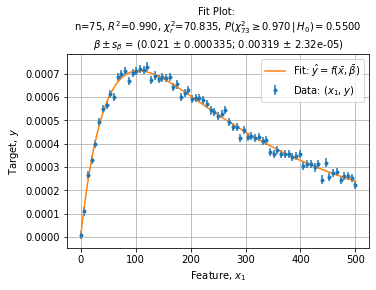

In [17]:
axe = solver.plot_fit()

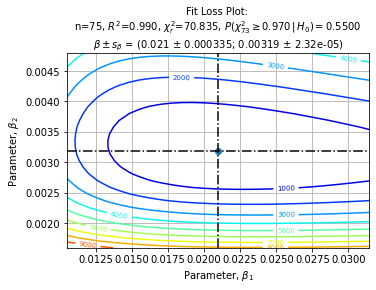

In [18]:
axe = solver.plot_loss(resolution=30)

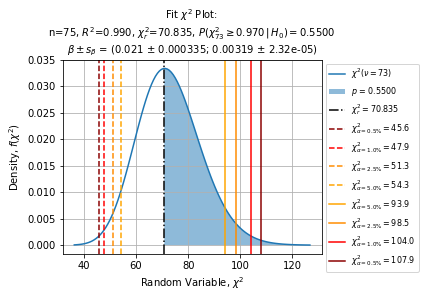

In [19]:
axe = solver.plot_chi_square()

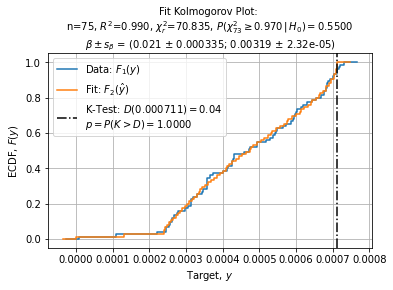

In [20]:
axe = solver.plot_kolmogorov()